In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm
import seaborn as sns
import time

### Refresher
##### What is the payoff of a call and a put?

# Exercise 1: European Options Pricer

BS European call option:
$$C = N(d_1)S_t - N(d_2)K e^{-r(T-t)}$$

BS European put option:
$$P = N(-d_2)K e^{-r(T-t)} - N(-d_1)S_t$$

where: 
- $N(\cdot)$ is the standard normal cumulative distribution function
- $d_1 = \frac{1}{\sigma\sqrt{(T-t)}}\big[\ln\big(\frac{S_t}{K}\big) + \big(r - d+ \frac{\sigma^2}{2} \big)(T-t) \big]$
- $d_2 = d_1 - \sigma \sqrt{T-t}$
- $t$ = contract start date in year
- $T$ = contract expiry date in year
- $S_t$ = spot price at $t$ 
- $K$ = strike price
- $\sigma$ = annualised volatility
- $r$ = annual risk-free rate
- $d$ = dividend yield

#### Check your implementation
Test case 1
- Inputs: $S_t = 100$ ; $K = 98$ ; $\sigma = 0.1$ ; $T-t = \frac{100}{365}$ ; $r = 0$ ; $d = 0$ ; option_type $=$ call
- Output: $C = 3.22$

Test case 2
- Inputs: $S_t = 125$ ; $K = 128$ ; $\sigma = 0.1$ ; $T-t = \frac{100}{365}$ ; $r = 0$ ; $d = 0$ ; option_type $=$ put
- Output: $P = 4.41$

In [2]:
def bs_eu_option(St, K, sigma , delta_t, r, d, option_type):  
    
    d_1 = (np.log(St/K)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t))

    d_2 = d_1 - (sigma*np.sqrt(delta_t))

    if option_type == "call":
        return norm.cdf(d_1) * St - norm.cdf(d_2) * K * np.exp(-r * delta_t)
    elif option_type == "put":
        return norm.cdf(-d_2) * K * np.exp(-r * delta_t) -norm.cdf(-d_1) * St
    else:
        print("Option type is invalid, please check")

In [3]:
bs_eu_option(St = 100, K = 100, sigma = 0.1 , delta_t = 2/31536000, r = 0, d=0, option_type = "call")


0.0010046661274714097

Notice that you could have written the options prices in this form
$$\text{Price} = \omega N(\omega d_1)S_t e^{-d(T-t)} - \omega N(\omega d_2)K e^{-r(T-t)}, \text{where } \omega = \begin{cases} 1, & \text{if Call} \\ -1, & \text{if Put} \end{cases}$$

## What do $N(d_1)$ and $N(d_2)$ mean?

$N(d_1)$ describes the rate of change of call option price with respect to change in underlying asset spot price, also called Delta ($\Delta$).
$$N(d_1) = \frac{dC}{dS} $$


$N(d_2)$ represents the probability that call option expires in the money. 
$$N(d_2) = P(S_T > K) $$

---
## Think
What is the probability of a call option expires out the money?

# Exercise 2: Binary Option Pricer

BS Binary call option:
$$C = N(d_2) e^{-r(T-t)}$$

BS Binary put option:
$$P = N(-d_2) e^{-r(T-t)}$$

where: 
- $N(\cdot)$ is the standard normal cumulative distribution function
- $d_1 = \frac{1}{\sigma\sqrt{(T-t)}}\big[\ln\big(\frac{S_t}{K}\big) + \big(r - d+ \frac{\sigma^2}{2} \big)(T-t) \big]$
- $d_2 = d_1 - \sigma \sqrt{T-t}$
- $t$ = contract start date in year
- $T$ = contract expiry date in year
- $S_t$ = spot price at $t$ 
- $K$ = strike price
- $\sigma$ = annualised volatility
- $r$ = annual risk-free rate
- $d$ = dividend yield


#### Check your implementation
Test case 1
- Inputs: $S_t = 100$ ; $K = 98$ ; $\sigma = 0.1$ ; $T-t = \frac{100}{365}$ ; $r = 0$ ; $d = 0$ ; option_type $=$ call
- Output: $C = 0.64$

Test case 2
- Inputs: $S_t = 125$ ; $K = 128$ ; $\sigma = 0.1$ ; $T-t = \frac{100}{365}$ ; $r = 0$ ; $d = 0$ ; option_type $=$ put
- Output: $P = 0.68$

In [4]:
def bs_binary_option(St, K, sigma , delta_t, r, d, option_type):
    d_1 = (np.log(St/K)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t))
    d_2 = d_1 - (sigma*np.sqrt(delta_t))
    
    if option_type == "call" or "c":
        return norm.cdf(d_2) * np.exp(-r * delta_t)
    elif option_type == "put" or "p":
        return norm.cdf(-d_2) * np.exp(-r * delta_t)
    else:
        print("Option type is invalid, please check")

In [5]:
bs_binary_option(St = 100, K = 100, sigma = 0.1 , delta_t = 2/31536000, r = 0, d=0, option_type = "call")

0.49999497666936266

# Exercise 3: Check for Mispricing

---

Pricing parameters: \
$S_t = 6135.34$ ; $K = 6135.34$ ; $\sigma = 1.0$ ; $T-t = \frac{1}{60 \times 24 \times 365}$ ; $r = 0$ ; $d = 0$

Markup:\
Commission $= \$ 0.012$

---

Reproduce the payout (payoff) for Rise/Fall contract (binary option) on Vol 100 (1s) index shown in the image below. 
![mispricing_check.png](attachment:mispricing_check.png)

In [6]:
'''
write your code here.....
'''

'\nwrite your code here.....\n'

# Exercise 4: Price Divergence
---

Pricing parameters: \
$S_t = 6135.34$ ; $K = 6135.34$ ; $\sigma = 1.0$ ; $r = 0$ ; $d = 0$

Markup:\
Commission $= \$ 0.012$

---

Reproduce the payouts (payoff) for Rise/Fall contracts (binary options) on Vol 100 (1s) index shown in the image below. Are the contracts mispriced?

![BO_price_divergence.png](attachment:BO_price_divergence.png)

In [7]:
'''
write your code here.....
'''

'\nwrite your code here.....\n'

## Why the divergence?


In [8]:
def call_prob_ITM(St, K, sigma , delta_t, r, d):
    d2 = (np.log(St/K)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t)) - (sigma*np.sqrt(delta_t))
    return norm.cdf(d2)

def put_prob_ITM(St, K, sigma , delta_t, r, d):
    d2 = (np.log(St/K)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t)) - (sigma*np.sqrt(delta_t))
    return norm.cdf(-d2)

### Recall the distribution of stock prices, why?

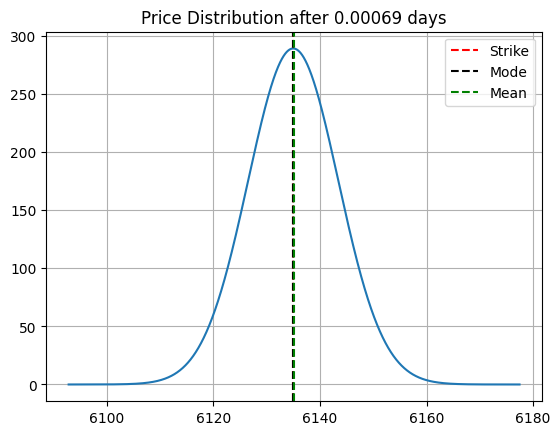

Mode = 6134.98
Mean = 6135.05
Median = 6135.00
Call ITM prob = 0.50
Put ITM prob = 0.50
European Call Expected Payoff = 10.60
European Put Expected Payoff = 10.56


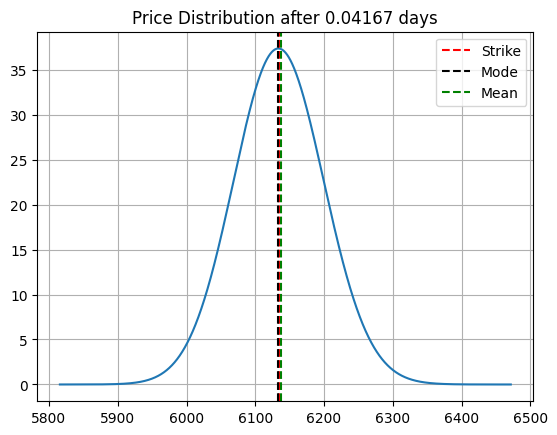

Mode = 6133.59
Mean = 6137.92
Median = 6135.00
Call ITM prob = 0.50
Put ITM prob = 0.50
European Call Expected Payoff = 83.07
European Put Expected Payoff = 80.85


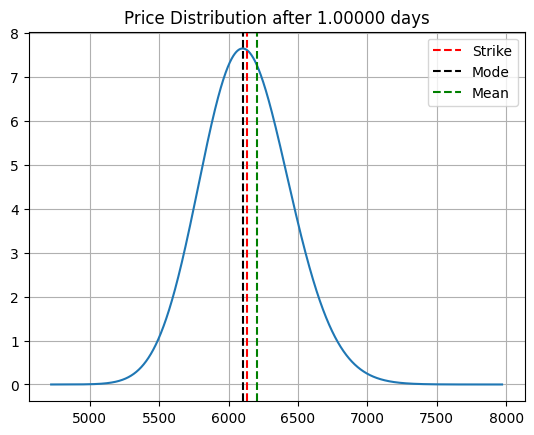

Mode = 6101.53
Mean = 6205.29
Median = 6135.00
Call ITM prob = 0.49
Put ITM prob = 0.51
European Call Expected Payoff = 429.72
European Put Expected Payoff = 376.29


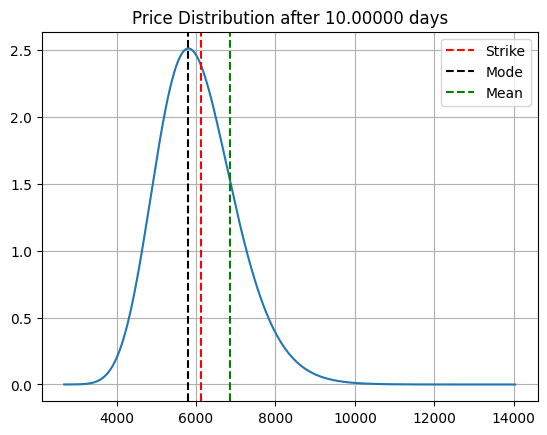

Mode = 5807.41
Mean = 6859.87
Median = 6135.00
Call ITM prob = 0.47
Put ITM prob = 0.53
European Call Expected Payoff = 1593.52
European Put Expected Payoff = 1045.90


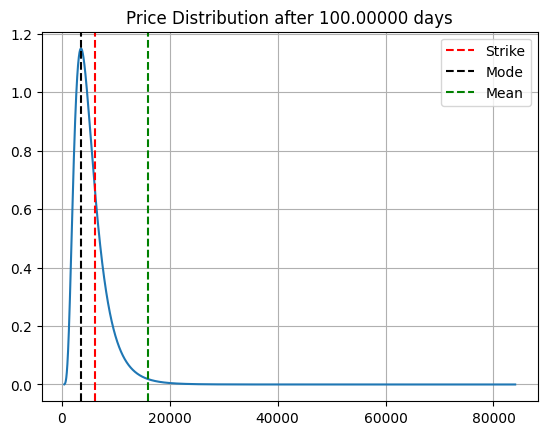

Mode = 3547.32
Mean = 15970.25
Median = 6135.00
Call ITM prob = 0.40
Put ITM prob = 0.60
European Call Expected Payoff = 9376.77
European Put Expected Payoff = 2390.08


In [9]:
# Let's check the duration's impact
r = 0
d = 0
S0 = 6135
K = 6135
sigma = 1
duration = [60, 3600, 24*3600, 240*3600, 2400*3600] 

for T in duration:
    # compute lognormal pdf
    mu = (r - d - sigma ** 2)*T / (365*24*60*60)
    var = sigma ** 2 * T / (365*24*60*60)
    S = np.exp(np.linspace(-np.sqrt(var)*5, np.sqrt(var)*5, 10000)) * S0
    pdf = np.exp(-(np.log(S/S0) - mu) ** 2/ (2*var)) / ((S/S0)*np.sqrt(var*2*np.pi))


    # stats
    mode = S[np.argmax(pdf)]
    mean = np.mean(S)
    median = np.median(S)
   


    # European option expected payoff
    call_prob = call_prob_ITM(St = S0, K = S0, sigma = 1, delta_t = T/(365*24*60*60), r = r, d = d)
    put_prob = put_prob_ITM(St = S0, K = S0, sigma = 1, delta_t = T/(365*24*60*60), r = r, d = d)
    call_expected_payoff = call_prob * np.mean(S[S>K] - K)
    put_expected_payoff = put_prob * np.mean(K - S[S < K])

    
    
    
    
    # plot
    plt.figure(dpi = 100)
    plt.plot(S, pdf)
    plt.axvline(x = S0, color = "red",  linestyle='dashed', label = "Strike")
    plt.axvline(x = mode, color = "black",  linestyle='dashed', label = "Mode")
    plt.axvline(x = mean, color = "green",  linestyle='dashed', label = "Mean")
    plt.title("Price Distribution after {:.5f} days".format(T/(24*3600)))
    plt.grid()
    plt.legend()
    plt.show()
    print("Mode = {:.2f}".format(mode))
    print("Mean = {:.2f}".format(mean))
    print("Median = {:.2f}".format(median))
    print("Call ITM prob = {:.2f}".format(call_prob))
    print("Put ITM prob = {:.2f}".format(put_prob))
    print("European Call Expected Payoff = {:.2f}".format(call_expected_payoff))
    print("European Put Expected Payoff = {:.2f}".format(put_expected_payoff))


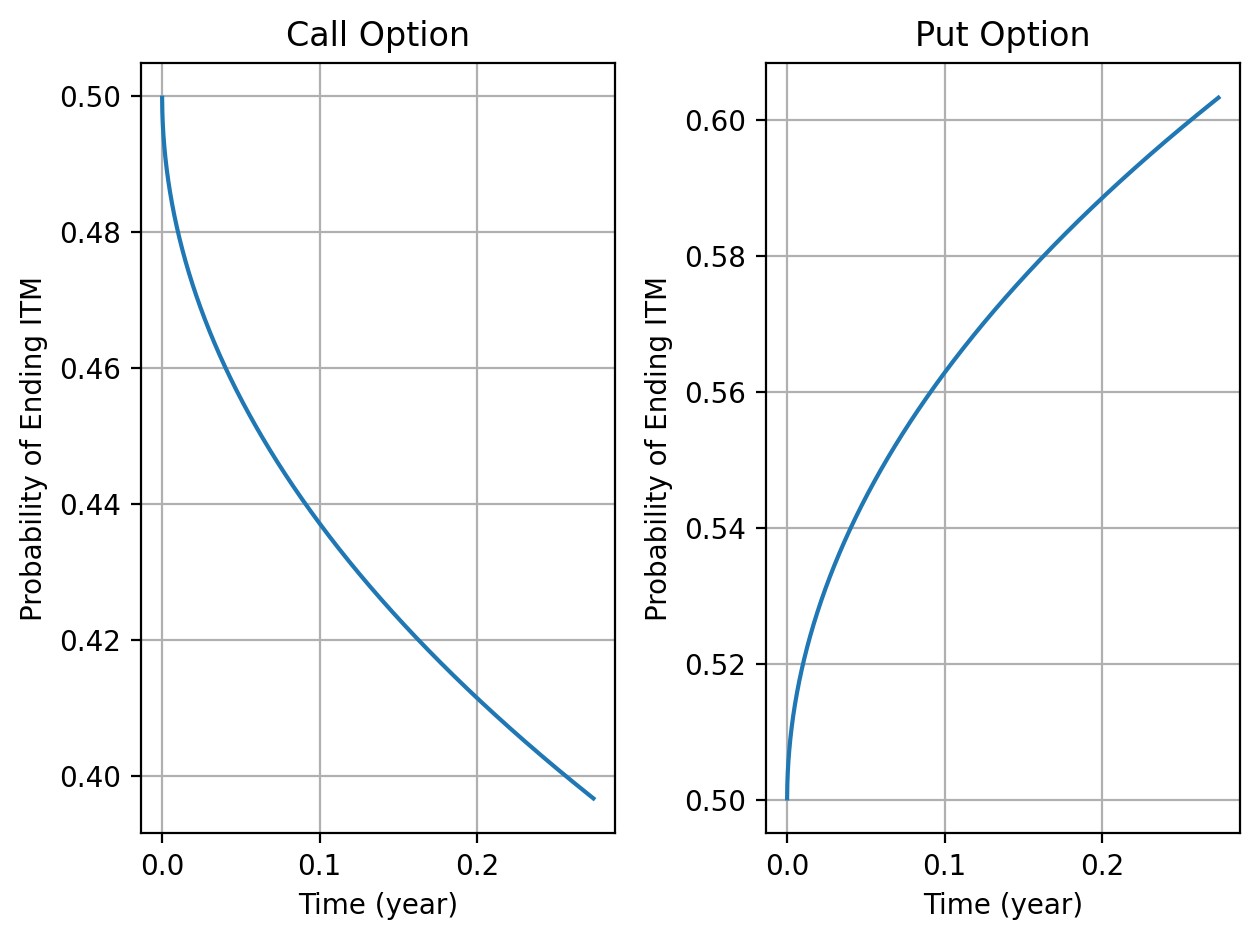

In [10]:
# Plot probability of ITM vs Duration
duration = np.linspace(60, 86400*100, 10000)

call_prob = call_prob_ITM(St = 6135.34, K = 6135.34, sigma = 1 , delta_t = duration/(365*86400), r = 0, d = 0)
put_prob = put_prob_ITM(St = 6135.34, K = 6135.34, sigma = 1 , delta_t = duration/(365*86400), r = 0, d = 0)

fig, axs = plt.subplots(1,2, dpi = 200)
axs[0].plot(duration/(365*86400), call_prob)
axs[0].set_xlabel("Time (year)")
axs[0].set_ylabel("Probability of Ending ITM")
axs[0].set_title("Call Option")
axs[0].grid()

axs[1].plot(duration/(365*86400), put_prob)
axs[1].set_xlabel("Time (year)")
axs[1].set_ylabel("Probability of Ending ITM")
axs[1].set_title("Put Option")
axs[1].grid()
fig.tight_layout()
plt.show()

# Exercise 5: What happens to option price when volatility increases? 


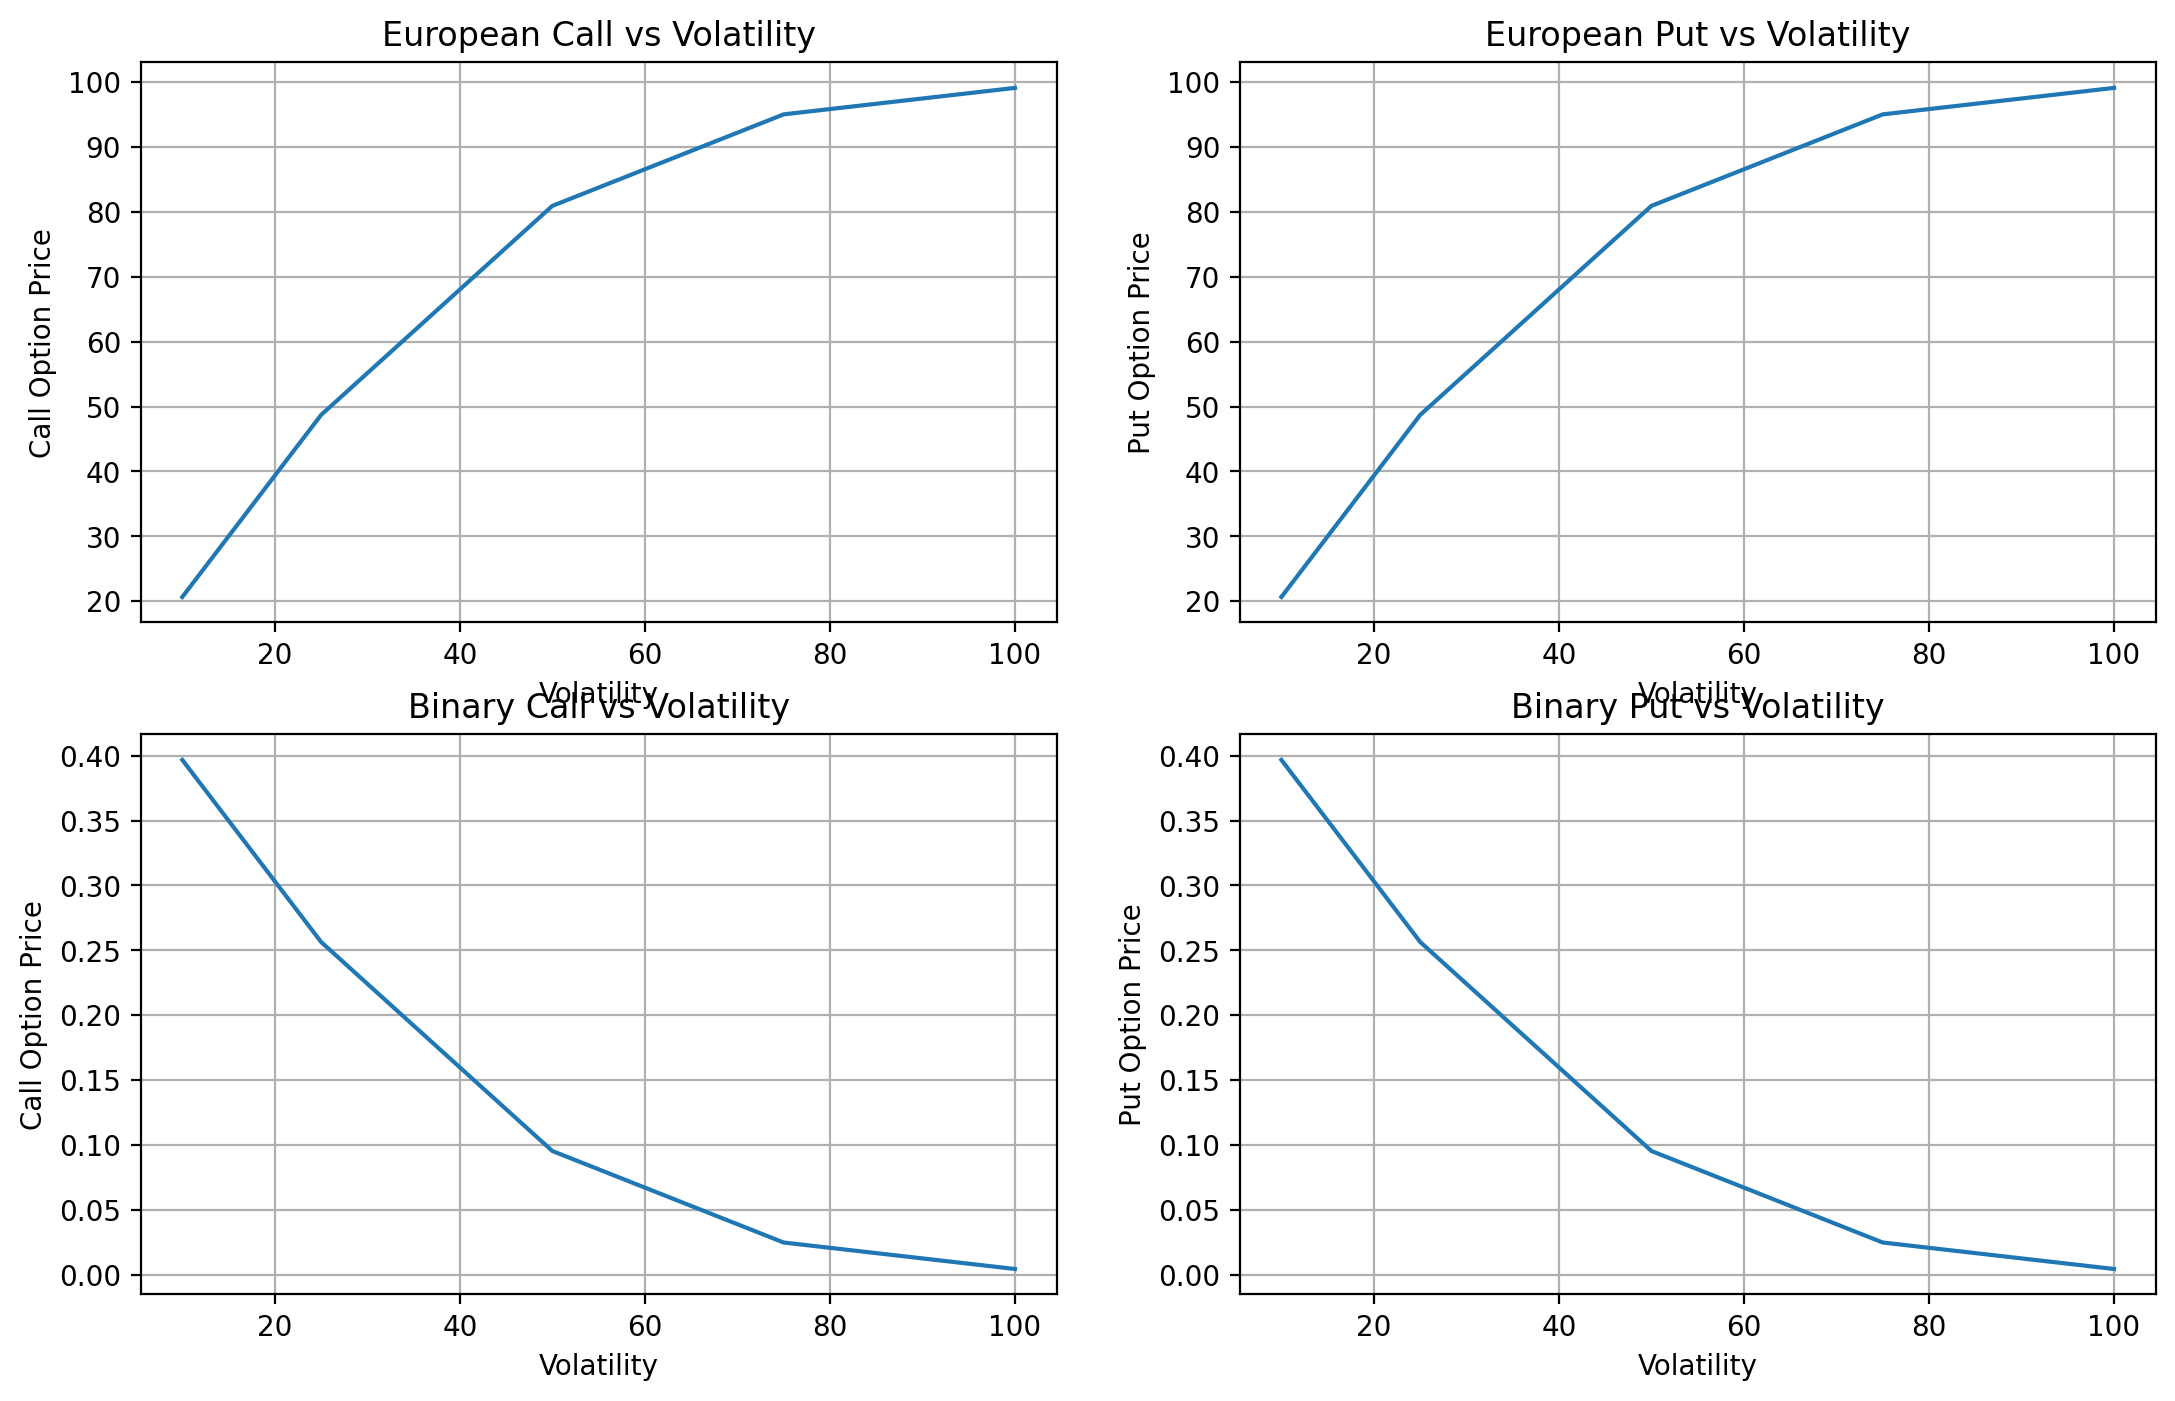

In [11]:
vols = [10, 25, 50, 75, 100]

eu_call_price = [bs_eu_option(St = 100, K = 100, sigma = vol, delta_t = 1/365, r = 0, d = 0, option_type = "call") for vol in vols]
eu_put_price = [bs_eu_option(St = 100, K = 100, sigma = vol, delta_t = 1/365, r = 0, d = 0, option_type = "put") for vol in vols]

binary_call_price = [bs_binary_option(St = 100, K = 100, sigma = vol, delta_t = 1/365, r = 0, d = 0, option_type = "call") for vol in vols]
binary_put_price = [bs_binary_option(St = 100, K = 100, sigma = vol, delta_t = 1/365, r = 0, d = 0, option_type = "put") for vol in vols]

fig, axs = plt.subplots(2,2, dpi=200, figsize=(13,8))
axs[0,0].plot(vols, eu_call_price)
axs[0,0].set_xlabel("Volatility")
axs[0,0].set_ylabel("Call Option Price")
axs[0,0].set_title("European Call vs Volatility")
axs[0,0].grid()

axs[0,1].plot(vols, eu_put_price)
axs[0,1].set_xlabel("Volatility")
axs[0,1].set_ylabel("Put Option Price")
axs[0,1].set_title("European Put vs Volatility")
axs[0,1].grid()

axs[1,0].plot(vols, binary_call_price)
axs[1,0].set_xlabel("Volatility")
axs[1,0].set_ylabel("Call Option Price")
axs[1,0].set_title("Binary Call vs Volatility")
axs[1,0].grid()

axs[1,1].plot(vols, binary_put_price)
axs[1,1].set_xlabel("Volatility")
axs[1,1].set_ylabel("Put Option Price")
axs[1,1].set_title("Binary Put vs Volatility")
axs[1,1].grid()

# Exercise 6: Monte Carlo Pricer

### Geometric Brownian Motion
Geometric brownian motion (GBM) is a continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion with drift. It is frequently used in mathematical finance to model asset prices in the Black-Scholes model.


$$ S_T = S_0 \exp \big[ \big(\mu - \frac{\sigma^2}{2} \big)T + \sigma W_T \big]$$

where:
- $S_T$ : spot price at time $T$ 
- $S_0$ : Initial stock price
- $\mu = r - d$ : drift
- $\sigma$ : volatility
- $W_t \sim N(0, t)$: Brownian motion

#### Discretised GBM
$$S_{t} = S_{t-1} \exp \big[ \big(\mu - \frac{\sigma^2}{2} \big)dt + \sigma \sqrt{dt} dW_t \big]$$

Write a Monte Carlo pricer (at least 10,000 GBM price paths) to determine the following option price: 
- European call: $S_t = 100$ ; $K = 95$ ; $\sigma = 0.08$ ; $T-t = \frac{1}{365}$ ; $r = 0$ ; $d = 0$ 
- European put: $S_t = 110$ ; $K = 110$ ; $\sigma = 0.25$ ; $T-t = \frac{1}{3650}$ ; $r = 0$ ; $d = 0$ 



In [12]:
def mc_pricer(St, K, sigma, delta_t, r, d, n_sample, option_type):
    dt = 1/(365*86400)
    n_steps = int(delta_t/dt)-1
    S0 = St
    payoff = 0
    for i in range(n_sample):
        z = np.random.normal(0,1, n_steps)
        S = S0*np.exp(np.cumsum((r-d - sigma**2/2)*dt + sigma*np.sqrt(dt)*z))
        if option_type == "call":
            payoff += max(S[-1] - K, 0)
        elif option_type == "put":
            payoff += max(K - S[-1], 0)
        else:
            raise NotImplementedError("Supported option types: 'call', 'put'")
    return payoff/n_sample * np.exp(-r*delta_t)

In [13]:
#testing 

dt = 1/(365*86400)
n_steps = int((1/365)/dt)-1
S0 = 100
payoff = 0

z = np.random.normal(0,1, n_steps)
S = S0*np.exp(np.cumsum((r-d - sigma**2/2)*dt + sigma*np.sqrt(dt)*z))

S

array([ 99.97058599,  99.99657842, 100.01275271, ...,  93.05557573,
        93.01716678,  92.97743469])

In [14]:
mc_pricer(St = 100, K = 98, sigma = 0.08, delta_t = 1/365, r = 0, d = 0, n_sample = 10000, option_type = "call")

1.9997868974265256

In [15]:
mc_pricer(St = 100, K = 98, sigma = 0.08, delta_t = 1/365, r = 0, d = 0, n_sample = 10000, option_type = "call")

1.9939097231672798

In [16]:
mc_pricer(St = 110, K = 110, sigma = 0.25, delta_t = 0.1/365, r = 0, d = 0, n_sample = 10000, option_type = "put")

0.18146949470993975

In [17]:
bs_eu_option(St = 100, K = 98, sigma = 0.08, delta_t = 1/365, r = 0, d = 0, option_type = "call")

2.000000055930073

In [18]:
bs_eu_option(St = 110, K = 110, sigma = 0.25, delta_t = 0.1/365, r = 0, d = 0, option_type = "put")

0.1815917096996742

### Compare For Loop vs Vectorised

In [19]:
'''
write your code here.....
'''

'\nwrite your code here.....\n'

# Exercise 7: Option Trading Strategies

Plot the payoff diagrams of the following trading strategies:
1. Call spread
    - Long one call with strike $K_1$ and short one call with strike $K_2$ (same expiry) ; $K_1$ < $K_2$
1. Put spread
    - Long one put with strike $K_2$ and short one put with strike $K_1$ (same expiry); $K_1$ < $K_2$
1. Straddle
    - Long one call and put with same strike and expiry.
1. Strangle 
    - Long one call with strike $K_2 $ and long one put with strike $K_1$ (same expiry) ; $K_1$ < $K_2$


In [20]:
def call_payoff(S, K):
    return np.maximum(S-K,0)
def call_spread_payoff(S, K1, K2):
    return call_payoff(S,K1) - call_payoff(S,K2)

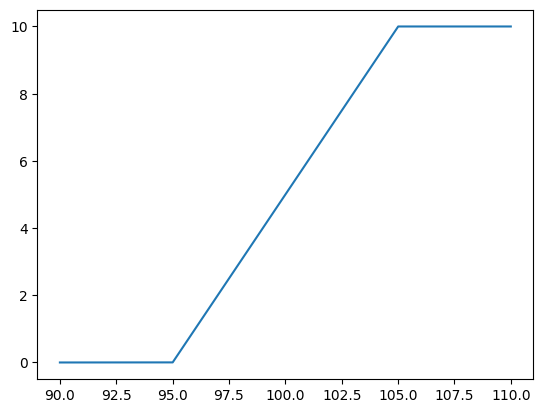

In [21]:
S = np.linspace(90, 110, 10000)

plt.plot(S, call_spread_payoff(S = S, K1 = 95, K2 = 105))


In [22]:
def put_payoff(S, K):
    return np.maximum(-S+K,0)

def put_spread_payoff(S, K1, K2):
    return put_payoff(S,K2) - put_payoff(S,K1)

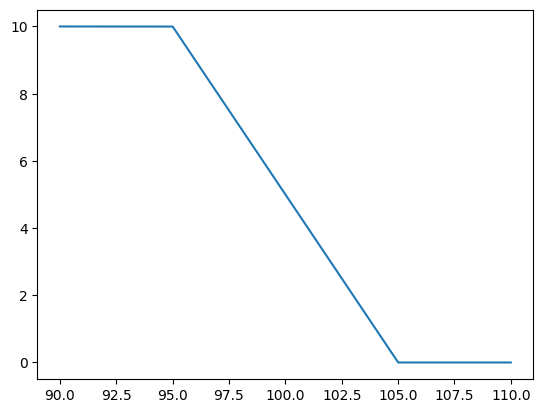

In [23]:
plt.plot(S, put_spread_payoff(S = S, K1 = 95, K2 = 105))

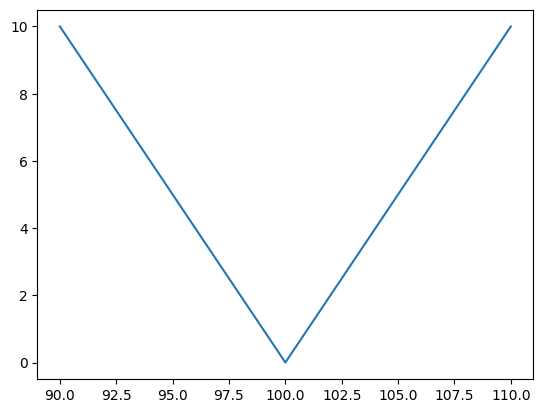

In [24]:
def straddle_payoff(S, K):
    return call_payoff(S, K) + put_payoff(S, K)

S = np.linspace(90, 110, 10000)

plt.plot(S, straddle_payoff(S = S, K = 100))


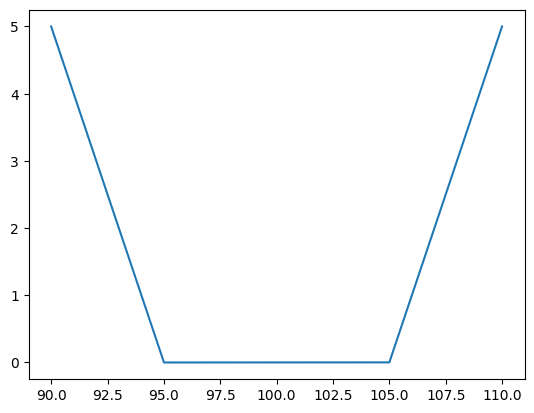

In [25]:
def straddle_payoff(S, K1, K2):
        return call_payoff(S, K2) + put_payoff(S, K1)

S = np.linspace(90, 110, 10000)

plt.plot(S, straddle_payoff(S = S, K1 = 95, K2 = 105))


# Exercise 8: Call Spread / Put Spread Pricing

$$\text{Call Spread} = C(S,K_1) - C(S, K_2)$$

$$\text{Put Spread} = P(S,K_2) - P(S, K_1)$$
where:
- $K_1$ is the lower strike
- $K_2$ is the upper strike


#### Check your implementation
Test case 1
- Inputs: $S_t = 100$ ; $K_1 = 95$ ; $K_2 = 105$; $\sigma = 0.5$ ; $T-t = \frac{1}{365}$ ; $r = 0$ ; $d = 0$ ; option_type $=$ call
- Output: $C = 4.99$

Test case 2
- Inputs: $S_t = 100$ ; $K_1 = 92$ ; $K_2 = 102$; $\sigma = 0.5$ ; $T-t = \frac{1}{365}$ ; $r = 0$ ; $d = 0$ ;  option_type $=$ put
- Output: $P = 2.34$


In [26]:
def spread_option(St, K1, K2, sigma , delta_t, r, d, option_type):
    k1_d1 = (np.log(St/K1)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t))
    k1_d2 = k1_d1 - (sigma*np.sqrt(delta_t))

    k2_d1 = (np.log(St/K2)+(r-d+((sigma**2)/2))*(delta_t))/(sigma*np.sqrt(delta_t))
    k2_d2 = k2_d1 - (sigma*np.sqrt(delta_t))

    if option_type == "call":
        return (norm.cdf(k1_d1) * St - norm.cdf(k1_d2) * K1 * np.exp(-r * delta_t)) - (norm.cdf(k2_d1) * St - norm.cdf(k2_d2) * K2 * np.exp(-r * delta_t))
    elif option_type == "put":
        return (norm.cdf(-k2_d2) * K2 * np.exp(-r * delta_t) - norm.cdf(-k2_d1) * St) - (norm.cdf(-k1_d2) * K1 * np.exp(-r * delta_t) - norm.cdf(-k1_d1) * St)
    else:
        raise NotImplementedError("Supported option types: 'call', 'put'")

In [27]:
upper = 105
lower = 95
spread_option(St = 100, K1 = lower, K2= upper, sigma = 0.5, delta_t = 1/365, r = 0 , d = 0, option_type = "call")

4.9915874747536115

In [28]:
upper = 102
lower = 92
spread_option(St = 100, K1 = lower, K2= upper, sigma = 0.5, delta_t = 1/365, r = 0 , d = 0, option_type = "put")

2.3422183876063043

### What happens when strikes are close to each other?

In [29]:
'''
write your code here.....
'''

'\nwrite your code here.....\n'

# Exercise 9: Estimate Volatility
Estimate the annualised volatility of Volatility 100 (1s) index & EURUSD.

## Volatility 100 (1s)'s Volatility

In [30]:
### Read feed data csv file
df = pd.read_csv("Vol_100_1s.csv")
df["ts"] = pd.to_datetime(df["ts"])

In [31]:
#compute vol
df["spot_shift"] = df["spot"].shift(1)
df["log_ret"] = np.log(df["spot"]/df["spot_shift"])
vol=df["log_ret"].std()/np.sqrt(1/365/24/60/60)

vol*100

100.05939273452564

## EURUSD's Volatility

In [32]:
### Read feed data csv file
df = pd.read_csv("EURUSD.csv")
df["ts"] = pd.to_datetime(df["ts"])

In [33]:
#compute vol

df["spot_shift"] = df["spot"].shift(1)
df["log_ret"] = np.log(df["spot"]/df["spot_shift"])
vol=df["log_ret"].std()/np.sqrt(1/365/24/60/60)

vol*100

8.659726343097798

# Exercise 10: Binomial tree

### European Binomial Tree

In [34]:
def european_tree2(S0, K, r, T, N, sigma, option_type):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u-d)
    S = np.zeros(N+1)
    discount = np.exp(-r * dt)
    
    for i in range(N+1):
        S[i] = S0 * u ** (N-i) * d ** i
        
    payoff = np.zeros(N+1)
    
    for i in range(N+1):
        if option_type == "call":
            payoff[i] = max(S[i] - K, 0)
        elif option_type == "put":
            payoff[i] = max(K - S[i], 0)
        else:
            raise NotImplementedError("Supported option types: 'call', 'put'")
            
    for j in np.arange(N-1, -1, -1):
        for i in range(j+1):
            payoff[i] = discount * (p * payoff[i] + (1-p) * payoff[i+1])
    return payoff[0]

### Try it yourself: Implement American Binomial Tree

In [35]:
def american_tree(S0, K, r, T, N, sigma, option_type):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u-d)
    S = np.zeros(N+1)
    discount = np.exp(-r * dt)
    
    for i in range(N+1):
        S[i] = S0 * u ** (N-i) * d ** i
        
    payoff = np.zeros(N+1)
    
    for i in range(N+1):
        if option_type == "call":
            payoff[i] = max(S[i] - K, 0)
        elif option_type == "put":
            payoff[i] = max(K - S[i], 0)
        else:
            raise NotImplementedError("Supported option types: 'call', 'put'")
            
    for j in np.arange(N-1, -1, -1):
        for i in range(j+1):
            payoff[i] = discount * (p * payoff[i] + (1-p) * payoff[i+1])
            S = S0 * u ** (j-1) * d ** i
            if option_type == "call":
                payoff[i] = np.maximum(payoff[i], S-K)
            if option_type == "put":
                payoff[i] = np.maximum(payoff[i], K-S)
    return payoff[0]

In [135]:
american_tree(S0 = 100, K = 105, r = 0, T = 1, N = 30, sigma = 0.1, option_type = "call")

22.796241296638577